In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 0, 'Z (mm)')

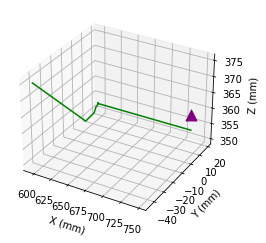

In [5]:
fig = plt.figure()
ax = plt.axes(projection='3d')
blackberry_pos = np.array([[748.29, 7.24, 361.28]])
ax.scatter3D(blackberry_pos[:,0], blackberry_pos[:,1], blackberry_pos[:,2], marker='^',s=120,c='purple')
ax.plot3D(full_trajectory[0,:], full_trajectory[1,:], full_trajectory[2,:], 'green')
ax.set_xlabel('X (mm)')
ax.set_ylabel('Y (mm)')
ax.set_zlabel('Z (mm)')

In [9]:
error = full_trajectory - blackberry_pos.reshape(-1,1)
print(error.shape)

(3, 12)


In [16]:
iteration = np.arange(1,13)

[ 1  2  3  4  5  6  7  8  9 10 11 12]


Text(0.5, 0, 'Iter #')

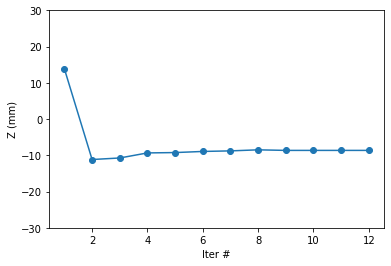

In [46]:
#plt.subplot(1,2, 1)
# plt.scatter(iteration,error[0,:])
# plt.plot(iteration,error[0,:])
# plt.ylabel("X (mm)")
# plt.ylim(-180,30)
# plt.xlabel("Iter #")

# plt.subplot(1,2, 2)
# plt.scatter(iteration,error[1,:])
# plt.plot(iteration,error[1,:])
# plt.ylabel("Y (mm)")
# plt.xlabel("Iter #")
# plt.ylim(-50,50)

# plt.subplot(1,3, 3)
# plt.scatter(iteration,error[2,:])
# plt.plot(iteration,error[2,:])
# plt.ylabel("Z (mm)")
# plt.ylim(-30,30)
# plt.xlabel("Iter #")

In [3]:
import socket
import time
import cv2
import numpy as np
from cmath import pi
import time
import os

os.chdir("/Users/tonytu/Desktop/Soft_Robotics_Internship/YOLO_UR5_Test")

from yolov5.detect import my_detection
YOLO_WEIGHT_FILE = "/Users/tonytu/Desktop/Soft_Robotics_Internship/YOLO_UR5_Test/yolov5/runs/train/exp3/weights/best.pt"
IMAGE_CENTER = np.array([640, 360])


cameraMatrix = np.array([[927.31957258, 0,667.19142084],[0,922.20248778,335.69393703],[0,0,1]])
dist = np.array([[-0.17574952,0.65288341, -0.00300312,  0.00724758, -0.95447869]])

def get_centroids_from_boxes(boxes):
    centroids = np.zeros((boxes.shape[0], 2))
    centroids[:,0] = (boxes[:,0] + boxes[:,2]) / 2
    centroids[:,1] = (boxes[:,1] + boxes[:,3]) / 2
    return np.int64(centroids)


def build_pose_string(pose):
    # pose is a list with length of 6
    # Cartesian tool pose (X, Y, Z, Roll, Pitch, Yaw).  Note: units are meter and rad. With respect to tool wrist frame (currently)
    values = str(pose[0]) + ", " + str(pose[1]) + ", " + str(pose[2]) + \
        ", " + str(pose[3]) + ", " + str(pose[4]) + ", " + str(pose[5])
    poseString = "(" + values + ")"
    return poseString


def move_robot(pose):
    # Cartesian tool pose (X, Y, Z, Roll, Pitch, Yaw).  Note: units are meter and rad. With respect to tool wrist frame (currently)
    HOST = "169.254.14.134"  # Laptop (server) IP address.
    PORT = 30002

    # Communicate with UR5
    s = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    s.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    s.bind((HOST, PORT))  # Bind to the port.
    s.listen(5)  # Wait for UR5 (client) connection.
    c, addr = s.accept()  # Establish connection with client.

    try:
        msg = c.recv(1024).decode()  # Receive message from UR5.
        if msg == 'UR3_is_asking_for_data':
            poseString = build_pose_string(pose)
            c.send(poseString.encode())
            c.close()
            s.close()

    except socket.error as socketerror:
            print("Error occured.")


def get_centroids_from_boxes(boxes):
    centroids = np.zeros((boxes.shape[0], 2))
    centroids[:,0] = (boxes[:,0] + boxes[:,2]) / 2
    centroids[:,1] = (boxes[:,1] + boxes[:,3]) / 2
    return np.int64(centroids)

In [4]:
trajectory = np.array([575.48,-43.46,375.52]).reshape(-1,1)

In [3]:
full_trajectory = np.loadtxt("trajectory.txt")

In [4]:
print(full_trajectory)
print(full_trajectory.shape)

[[595.5       595.5       595.5       595.5       595.5       595.5
  595.5       595.5       595.5       671.9916177 711.5921237 735.9168197]
 [-44.02        5.4244444  14.4037726  16.3159173  17.4980879  18.1699225
   18.5058398  18.7190181  18.3831008  18.3831008  18.3831008  18.3831008]
 [375.12      350.12      350.5463566 351.9417054 352.0386047 352.3486822
  352.5037209 352.7944186 352.6393798 352.6393798 352.6393798 352.6393798]]
(3, 12)
